In [1]:
import json
import pandas as pd
import numpy as np
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

Hyper params

In [3]:
# thresholod
isShortVector = bool(input("Vector is Input:short or Enter:long"))

# normed
isNormed = bool(input("Vector is Input:normed or Enter:not"))

thres = 2.
lower_bound = 0.5
if isShortVector:
    thres = 0.5
    lower_bound = 0.

norm = "unnorm"
if isNormed:
    norm = "norm"

print(f"Short? >> {isShortVector} \nNormed? >> {isNormed}")

Short? >> True 
Normed? >> True


In [4]:
save_dir_name = "results_trans_prob"
result_dir_name = "add_metadata_win20_test_kmeans_class10"
path_to_metada = f"../outputs/2021-01-27/plt_onewindow_3k/plt_test_win_20/projector/{result_dir_name}/metadata.tsv"

Load

In [5]:
df = pd.read_csv(path_to_metada, sep="\t")

Calc 状態遷移確率

In [6]:
kmeans_next = np.append(df.iloc[1:].loc[:, "kmeans"].values, [-1])

df_tmp = pd.DataFrame(kmeans_next, columns=["kmeans_next"])
df_transition_probability = pd.concat([df, df_tmp], axis=1)
df_transition_probability = df_transition_probability.loc[:, ["kmeans", "kmeans_next", "vector_scalar"]]
df_transition_probability.columns = ["now", "next", "vector_scalar"]

df_transition_probability  = df_transition_probability[df_transition_probability.loc[:, "vector_scalar"]<thres]
df_transition_probability  = df_transition_probability[df_transition_probability.loc[:, "vector_scalar"]>lower_bound]

trans_prob = dict(df_transition_probability.iloc[:, :-1].value_counts())

arr_trans_prob = np.zeros((max(max(trans_prob))+1, max(max(trans_prob))+1))
for (now_, next_), val in trans_prob.items():
    arr_trans_prob[int(now_), int(next_)] = val

if isNormed:
    for i in range(arr_trans_prob.shape[0]):
        arr_trans_prob[i, :] = arr_trans_prob[i, :] / sum(arr_trans_prob[i, :])


Plot

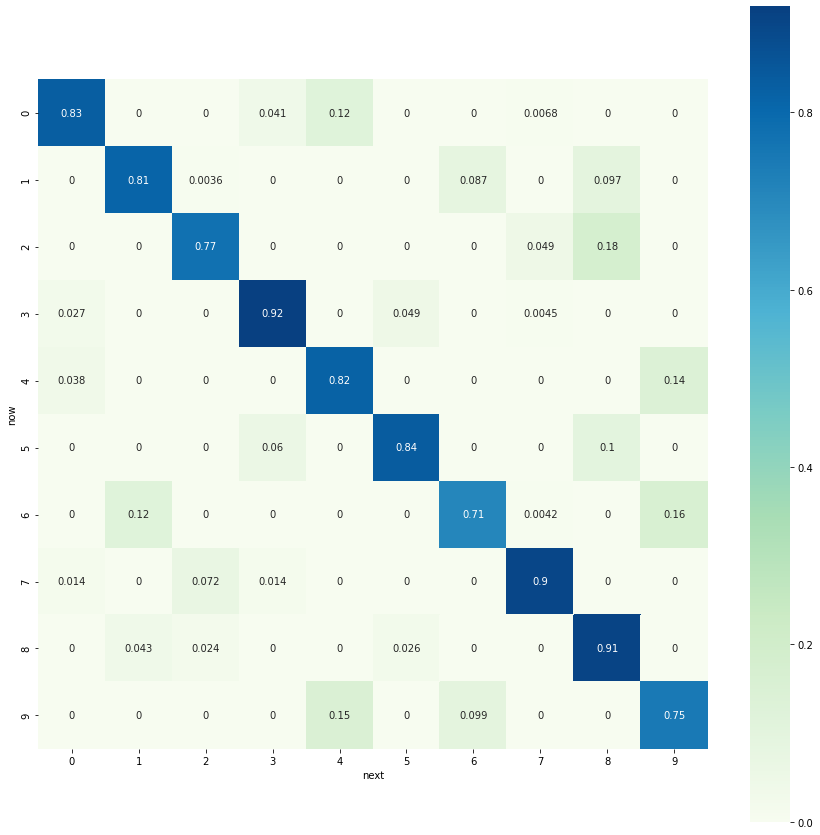

In [12]:
plt.figure(figsize=(15, 15))
sns.heatmap(arr_trans_prob, cmap="GnBu", annot=True, square=True)#, fmt="g")
plt.xlabel("next")
plt.ylabel("now")
plt.savefig(f"{save_dir_name}/matrix/matrix_{result_dir_name}_thres_from_{lower_bound}_to_{thres}_{norm}.png")
plt.show()

マルコフ遷移図書きたい

In [26]:
from graphviz import Graph, Digraph

dg = Digraph(format="png")
color_dict = {
    0: "blue",
    1: "red",
    2: "magenta",
    3: "skyblue",
    4: "green",
    5: "brown",
    6: "yellow",
    7: "orange",
    8: "purple",
    9: "gray",
}
# node
if arr_trans_prob.shape[0] < 11:
    for i in range(arr_trans_prob.shape[0]):
        if i == 10:
            pass
        else:
            dg.node(str(i), color=color_dict[i])
# edge
for now_ in range(arr_trans_prob.shape[0]):
    for next_ in range(arr_trans_prob.shape[1]):
        value = arr_trans_prob[now_][next_]
        if now_ == arr_trans_prob.shape[0] or next_ == arr_trans_prob.shape[1]:
            pass
        elif value <= 0.:
            pass
        elif value == None:
            pass
        elif now_ == next_:
            pass
        else:
            dg.edge(str(now_), str(next_), label="{:0=.2f}".format(value))

dg.render(f"{save_dir_name}/digraph/digraph_{result_dir_name}")

'results_trans_prob/digraph_add_metadata_win20_test_kmeans_class15.png'